<a href="https://colab.research.google.com/github/raymondzhao1/2.1-SFFD/blob/main/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
from google.colab import files
uploaded = files.upload()
#data = pd.read_csv("housing.csv")
data = pd.read_csv(io.BytesIO(uploaded['housing.csv']))
# Median house value is goal
# Need to pre process ocean_proximity.
data.info

Saving housing.csv to housing.csv


<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [ ]:
data.dropna(inplace=True) # Drops nan values; Parameter saves result in data object

In [48]:
data.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
train_data = X_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11366,-117.95,33.74,25.0,1393.0,243.0,976.0,245.0,5.4485,<1H OCEAN,225200.0
13873,-117.31,34.39,15.0,1703.0,273.0,847.0,266.0,3.7917,INLAND,123400.0
2565,-124.15,40.78,41.0,2127.0,358.0,911.0,349.0,3.1711,NEAR OCEAN,104200.0
3764,-118.41,34.17,27.0,3277.0,648.0,1382.0,615.0,3.8750,<1H OCEAN,366100.0
16671,-120.68,35.25,16.0,4208.0,897.0,1634.0,806.0,2.2868,NEAR OCEAN,233700.0
...,...,...,...,...,...,...,...,...,...,...
6036,-117.73,34.06,34.0,344.0,108.0,315.0,119.0,3.1786,INLAND,117800.0
18869,-122.22,38.10,44.0,3013.0,563.0,1353.0,512.0,3.4559,NEAR BAY,111900.0
19054,-121.69,38.16,46.0,2292.0,472.0,970.0,431.0,2.2888,INLAND,94900.0
15818,-122.42,37.76,52.0,1494.0,610.0,1630.0,590.0,1.6500,NEAR BAY,265000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77c8a20a60>,
      dtype=object)

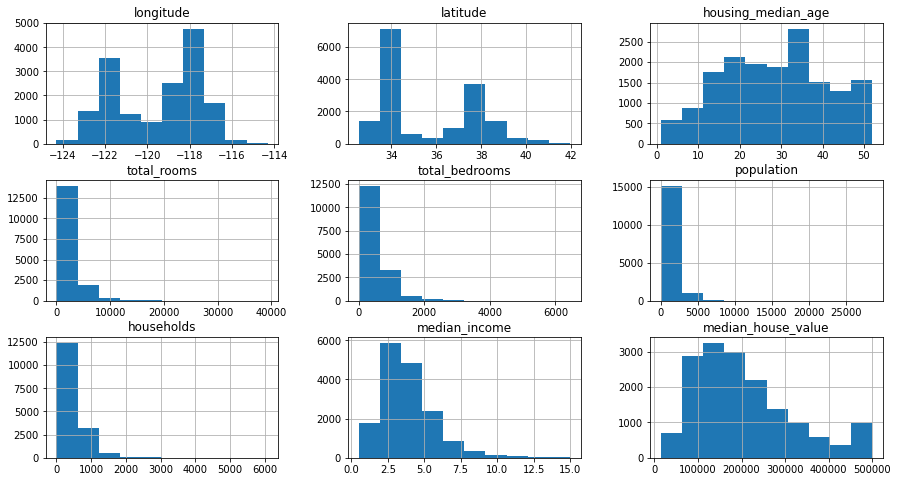

In [ ]:
train_data.hist(figsize=(15,8))

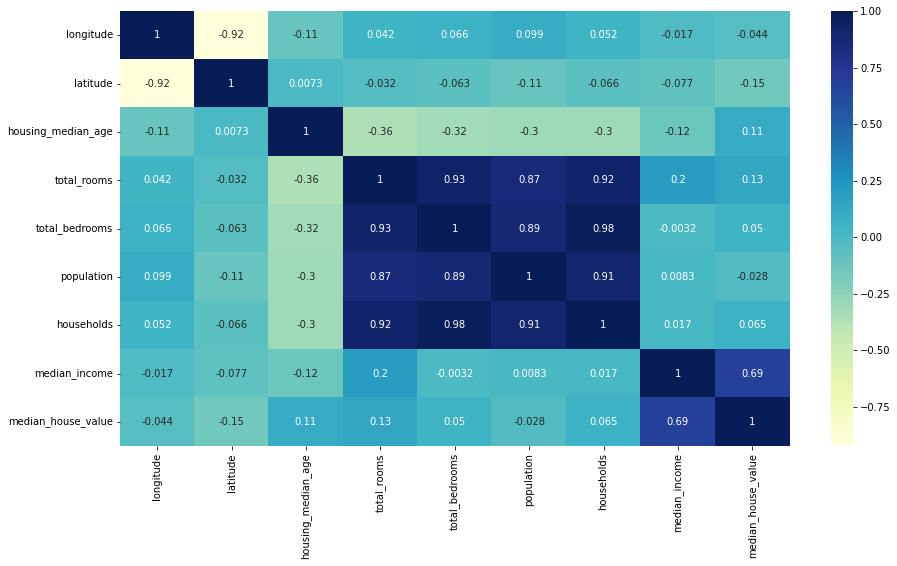

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") # Produces a correlation heatmap matrix.
# Median income correlates to median house value (might be an important variable)
# END OF DATA EXPLORATION

In [ ]:
#PREPROCESSING
# Use log to process skewed data.
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1) # + 1 prevents zeros.
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77c585ea60>,
      dtype=object)

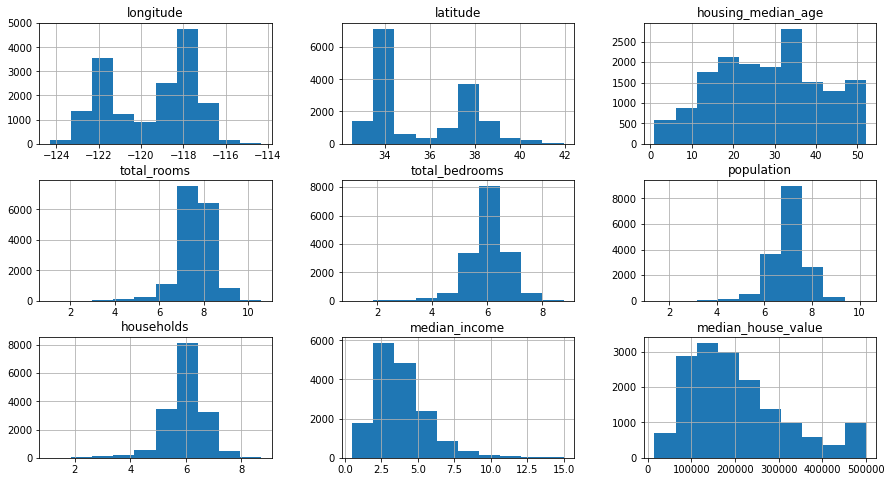

In [ ]:
train_data.hist(figsize=(15, 8)) # Looks more gaussian now

In [ ]:
# Let's try to use ocean proximity.

In [ ]:
#train_data.ocean_proximity.value_counts()
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1) #hardcode

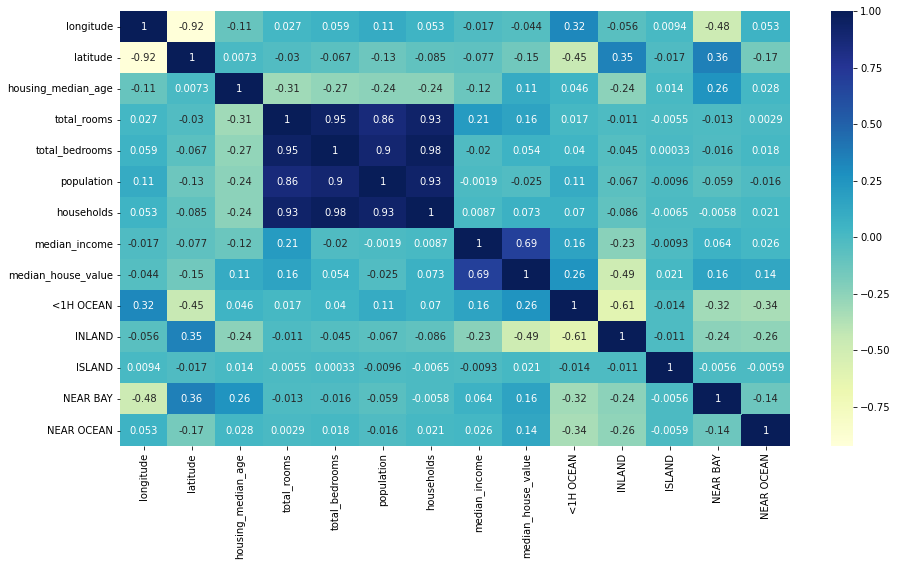

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") # Produces a correlation heatmap matrix.
# Median income correlates to median house value (might be an important variable)
# END OF DATA EXPLORATION

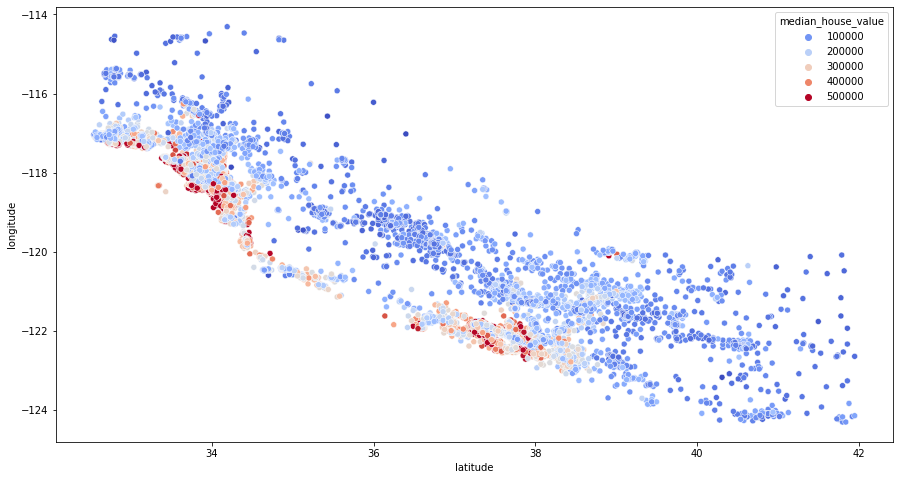

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y='longitude', data=train_data, hue="median_house_value", palette="coolwarm")

In [ ]:
#Programming a feature called bedroom ratio.
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

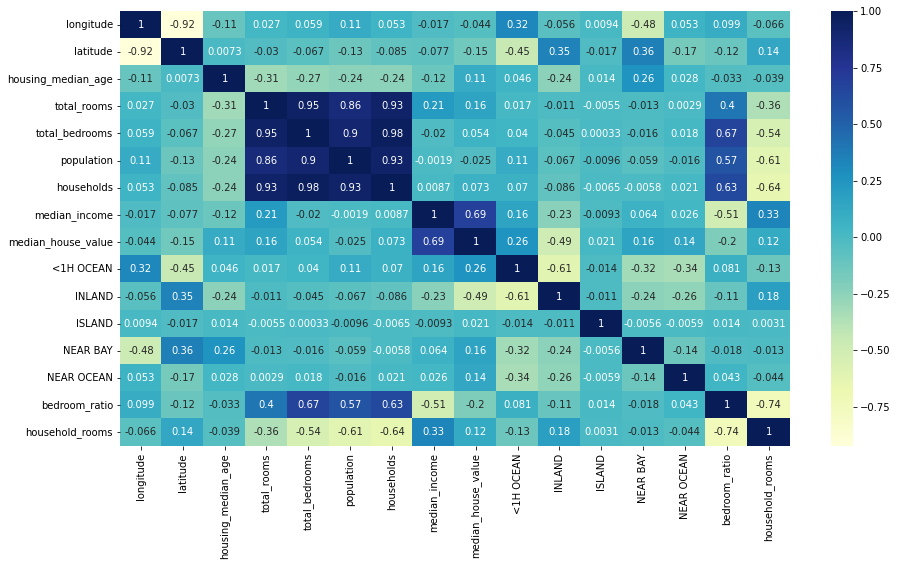

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
test_data = X_train.join(y_train)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1) # + 1 prevents zeros.
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
11366,-117.95,33.74,25.0,7.239933,5.497168,6.884487,5.505332,5.4485,225200.0,1,0,0,0,0,0.759284,1.315077
13873,-117.31,34.39,15.0,7.440734,5.613128,6.742881,5.587249,3.7917,123400.0,0,1,0,0,0,0.754378,1.331735
2565,-124.15,40.78,41.0,7.662938,5.883322,6.815640,5.857933,3.1711,104200.0,0,0,0,0,1,0.767763,1.308130
3764,-118.41,34.17,27.0,8.094989,6.475433,7.232010,6.423247,3.8750,366100.0,1,0,0,0,0,0.799931,1.260264
16671,-120.68,35.25,16.0,8.344980,6.800170,7.399398,6.693324,2.2868,233700.0,0,0,0,0,1,0.814881,1.246762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,-117.73,34.06,34.0,5.843544,4.691348,5.755742,4.787492,3.1786,117800.0,0,1,0,0,0,0.802826,1.220586
18869,-122.22,38.10,44.0,8.011023,6.335054,7.210818,6.240276,3.4559,111900.0,0,0,0,1,0,0.790792,1.283761
19054,-121.69,38.16,46.0,7.737616,6.159095,6.878326,6.068426,2.2888,94900.0,0,1,0,0,0,0.795994,1.275062
15818,-122.42,37.76,52.0,7.309881,6.415097,7.396949,6.381816,1.6500,265000.0,0,0,0,1,0,0.877592,1.145423


In [ ]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), train_data['median_house_value']


In [ ]:


reg.score(x_test, y_test)

0.6750046333153052

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test, y_test)

0.9748702611722491

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train, y_train)
                           

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test, y_test)

0.9719634227221022